# MKTG 2120 Homework 2

## Question 1 

In this question, we will revisit the Hertz data from Assignment 1. This secure data set is
available on Canvas under the Modules tab, and can be downloaded after you have signed the
DUA.

---

### 1a.

Using multiple regression, regress Recommend_Hertz on:
- the other survey questions (i.e., those that are highlighted in the data key)
- the total cost of the rental (total_charge_USD), and
- the difference (in days) between when people returned the car and when they filled out the survey (Survey_checkout_diff).

Report the model results. Then, list the variables in order of importance. Finally,
interpret the results, both statistically and managerially. What do you conclude about
which variables are predictive of recommending Hertz? How could Hertz use this
information?
(Hint: Before running the analysis, you should remove any rows that have a blank for any
one of your variables. You can do this using the filter function in Excel. Otherwise, you may
get an error.)

---

In [ ]:
library(readr)
library(tidyverse)

In [ ]:
# Run multiple regression with standardized independent variables
hertz <- read.csv("/content/hertz.csv")
hertz_reg <- lm(Recommend_Hertz ~ scale(Staff_Courtesy)
                + scale(Speed_of_Service)
                + scale(Veh_Equip_Condition)
                + scale(Trans_Billing_as_Expected)
                + scale(Value_for_the_Money)
                + scale(Total_charge_USD)
                + scale(Survey_checkout_diff), data = hertz)
summary(hertz_reg)


Call:
lm(formula = Recommend_Hertz ~ scale(Staff_Courtesy) + scale(Speed_of_Service) + 
    scale(Veh_Equip_Condition) + scale(Trans_Billing_as_Expected) + 
    scale(Value_for_the_Money) + scale(Total_charge_USD) + scale(Survey_checkout_diff), 
    data = hertz)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0683 -0.2346 -0.0550  0.5341  6.4243 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       7.66148    0.02220 345.180   <2e-16 ***
scale(Staff_Courtesy)             0.44637    0.03141  14.212   <2e-16 ***
scale(Speed_of_Service)           0.27178    0.03062   8.876   <2e-16 ***
scale(Veh_Equip_Condition)        0.39187    0.02688  14.576   <2e-16 ***
scale(Trans_Billing_as_Expected)  0.37642    0.02946  12.779   <2e-16 ***
scale(Value_for_the_Money)        0.66977    0.03138  21.345   <2e-16 ***
scale(Total_charge_USD)           0.03360    0.02241   1.499    0.134    
scale(Survey_checkout_diff)       

Variables in order of importance:
1.   Value for the money
2.   Staff courtesy
3.   Vehicle condition
4.   Transaction/billing as expected
5.   Speed of service
6.   Total charges
7.   Survey-checkout difference

Statistical interpretation:
*   In this case, the intercept represents the value of recommend Hertz when all of the standardized independent variables are equal to zero standard deviations. Therefore, it is the mean of the recommend Hertz scale. Each independent variable has been standardized because the variables with scales have different units than those with price or days.
*  A one standard deviation change in the standardized “value for the money” variable is associated with a 0.67 standard deviation increase in the recommend Hertz scale, holding all other variables constant. Relative to their individual coefficients, the same is true for each of the IVs that involve a subjective scale (variables 1 through 5 in importance)→  each of their coefficients are positive because an increase in satisfaction for any of the scales would only increase overall satisfaction.
*   The p-values (0.134 and 0.359, respectively) of the total charges and survey-checkout difference variables suggest that there is weak evidence to reject the null hypotheses that their coefficients are equal to zero. There is weak evidence to suggest that they have a significant effect on the recommend Hertz score.
*   As for the model itself, the F-statistic and its low p-value (p < 0.05) implies that at least one of the independent variables has a statistically significant impact on the recommend Hertz dependent variable. The adjusted R-squared value indicates that 0.66 of the variance in the recommend Hertz score can be explained by the IVs.
*   Looking at the predictors, it is clear that customer service and vehicle performance are the biggest indicators of recommendation. Hence, as a manager, it is important to make sure that each vehicle is functioning, and that employees are accommodating and helpful. It seems as if total charge is not a significant predictor of recommendation, as long as customers feel they have received solid value for their money. This data tells us that customers aren’t necessarily as worried about the dollar amount of the price itself, but about experiencing as few bumps in the road as possible. Hertz could use this data to invest more in employee training programs and newer car models, which would help customers feel like they are getting the most bang for their buck.


### 1b.

Is there any issue with multicollinearity in your analysis? (2 points)

---

In [ ]:
keep_cols <- c(9, 10, 11, 12, 13, 14, 35, 36)
cor_hertz <- subset(hertz, select = keep_cols)
View(cor_hertz)

cor_hertz2 <- na.omit(cor_hertz)
  cor(cor_hertz2)
  cor.test(cor_hertz2$Recommend_Hertz,
           cor_hertz2$Value_for_the_Money)
  cor.test(cor_hertz2$Staff_Courtesy,
           cor_hertz2$Speed_of_Service)
  cor.test(cor_hertz2$Recommend_Hertz,
           cor_hertz2$Staff_Courtesy)

,Recommend_Hertz,Staff_Courtesy,Speed_of_Service,Veh_Equip_Condition,Trans_Billing_as_Expected,Value_for_the_Money,Total_charge_USD,Survey_checkout_diff
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,7,9,0,7,7,7,63.84,3
2,9,9,9,9,9,9,216.98,5
3,9,NA,NA,NA,NA,NA,48.52,2
4,9,9,9,9,9,9,326.09,2
5,9,9,9,8,8,9,188.16,2
6,9,9,9,9,9,9,307.54,2
7,5,9,7,2,5,4,273.63,3
8,9,8,8,9,8,8,48.85,24
9,8,8,6,8,7,7,496.26,2


,Recommend_Hertz,Staff_Courtesy,Speed_of_Service,Veh_Equip_Condition,Trans_Billing_as_Expected,Value_for_the_Money,Total_charge_USD,Survey_checkout_diff
Recommend_Hertz,1.000000000,0.6293520996,0.58313010,0.561730016,0.61024121,0.69961276,0.0056127450,-0.029600542
Staff_Courtesy,0.629352100,1.0000000000,0.65826205,0.409679987,0.49618610,0.47866274,-0.0003796029,-0.040023533
Speed_of_Service,0.583130096,0.6582620527,1.00000000,0.384461625,0.46803891,0.45538301,0.0242810750,-0.040178692
Veh_Equip_Condition,0.561730016,0.4096799874,0.38446163,1.000000000,0.32512470,0.52409082,0.0318083996,-0.009554054
Trans_Billing_as_Expected,0.610241208,0.4961861012,0.46803891,0.325124695,1.00000000,0.60146691,-0.0269113725,-0.064372627
Value_for_the_Money,0.699612763,0.4786627377,0.45538301,0.524090817,0.60146691,1.00000000,-0.0462166580,-0.037202223
Total_charge_USD,0.005612745,-0.0003796029,0.02428108,0.031808400,-0.02691137,-0.04621666,1.0000000000,0.014253370
Survey_checkout_diff,-0.029600542,-0.0400235330,-0.04017869,-0.009554054,-0.06437263,-0.03720222,0.0142533702,1.000000000



	Pearson's product-moment correlation

data:  cor_hertz2$Recommend_Hertz and cor_hertz2$Value_for_the_Money
t = 52.792, df = 2907, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6805746 0.7177068
sample estimates:
      cor 
0.6996128 



	Pearson's product-moment correlation

data:  cor_hertz2$Staff_Courtesy and cor_hertz2$Speed_of_Service
t = 47.146, df = 2907, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6371626 0.6783756
sample estimates:
      cor 
0.6582621 



	Pearson's product-moment correlation

data:  cor_hertz2$Recommend_Hertz and cor_hertz2$Staff_Courtesy
t = 43.664, df = 2907, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6068908 0.6508089
sample estimates:
      cor 
0.6293521 


To measure collinearity, we created a correlation matrix with correlation coefficients between each IV. Inherently, these IVs were bound to affect and inform each other. For instance, speed of service is moderately correlated with staff courtesy because customers value promptness in their overall staff satisfaction. Going off room of thumb →  |correlation| > 0.9 = problematic, none of the correlations were large enough to generate untrustworthy estimates; the highest correlation is between value for the money and recommend Hertz = 0.70. Most of the correlations lie between 0.4 and 0.7, which is fairly moderate. To confirm, I ran several coefficient t-tests for the highest variable correlations, all of which yielded significant results (p-value 2.2e-16). And, looking at the small difference in the multiple R-squared and adjusted R-squared statistics (0.661-0.6602), it appears that each variable contributes meaningfully and noncollinearly to the variability.

### 1c.


In Assignment 1, we split the Recommend_Hertz variable into three groups: the
promoters who gave ratings 8-9, the neutrals who gave ratings 6-7, and the detractors
who gave ratings 0-5. We then used hypothesis tests to understand how promoter status
depends on various variables (e.g., purpose of travel). An alternative approach is to use
regression analysis, like we did in part a of this question, treating Recommend_Hertz as
the DV. What is one reason we may favor splitting over regression? What is one reason
we may favor regression over splitting?
(Hint: think about the measurement scale, and what we can learn from the analysis.)

---

*   In Assignment 1, we evaluated whether nominal variables were related, which allowed us to determine that the purpose of travel was associated with NPS score. We were then able to split the data based on NPS score in order to evaluate trends within the promoter group. Hypothesis testing allows us to split groups into subsets and ascertain specific dependencies and relationships. We were able to find where the potential holes were in customer satisfaction and habits, which helped us to make recommendations accordingly. It might be more useful when you have a rational guess for the existence or cause of a particular problem, or when you want to highlight more specific nominal variables.
*   For this assignment, we worked primarily with regression, which utilizes interval and ratio variables. It allowed us to determine how variables are interrelated, and order them based on magnitude of importance. Unlike with hypothesis testing, we were able to not only make statistical inferences, but predict/explain customer satisfaction quantitatively (direction, strength, and significance). So, while hypothesis testing and splitting was more adept at identifying specific conflicts of interest, regression gives us a more general perspective of the relative importance of factors. Regression might also be more useful in evaluating variables in the context of their relationship with other variables; hypothesis testing and splitting takes you out of that context. The problem with regression in this scenario is that if we split into promoters, passives, and detractors, we wouldn’t be able to infer if the importance of IVs within the groups were dependent on their group designations.



## Quesion 2

This question uses a different dataset from the same major international video game company
from Assignment 1, provided to us by WCA. This secure data set is available on Canvas under the
Modules tab, and can be downloaded after you have signed the DUA.
In the last assignment, you analyzed the relationship between number of play sessions in the
company’s football video game and real-life NFL events. The company is also interested in
understanding player engagement within their games, and in particular, how different in-game
features, and the different platforms players can use to play their games, affect how much time
people spend playing. The file sessions_m15_top4modes_2kusers.csv contains data about users
playing the game, which you should use to answer the following questions:

---

### 2a.

The main dependent variable of interest for the company is Duration, which is how long
in seconds a player plays the game in a single session. Create a plot that compares the
distribution of this variable for players who play Single-player (Game_Type = “Single-
player”) versus Multi-player (Game_Type = “Multi-player”) game types. Describe the
results.

---

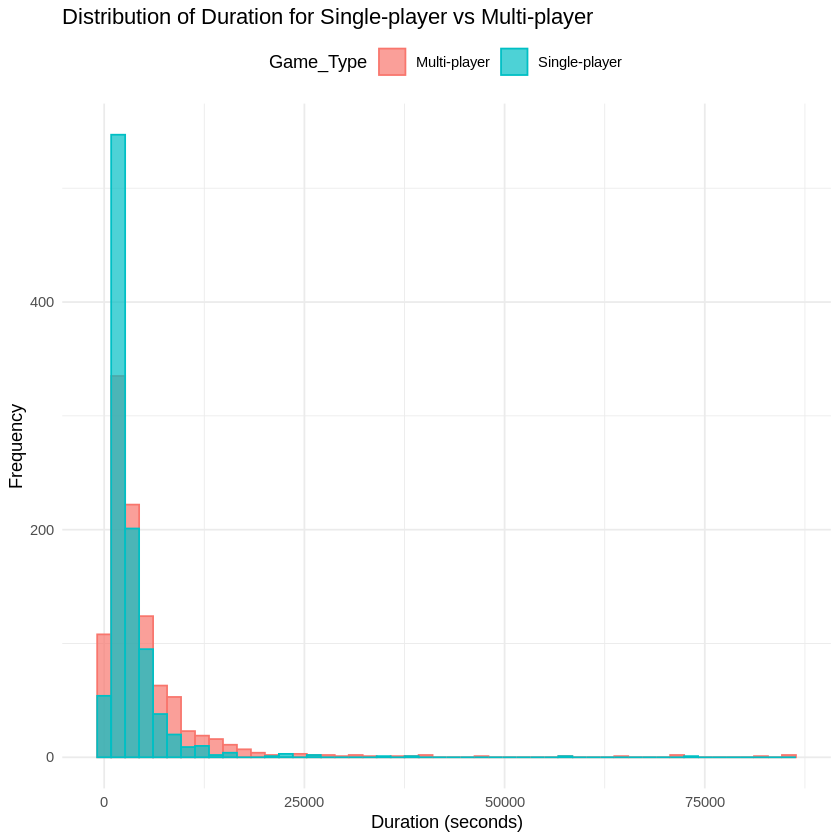

In [ ]:
library(ggplot2)
library(readxl)
library(dplyr)
library(tidyr)
data <- read.csv("/content/sessions_m15_top4modes_2kusers.csv")

single_player <- subset(data, Game_Type == "Single-player")
multi_player <- subset(data, Game_Type == "Multi-player")

data %>% ggplot() +
  geom_histogram(aes(x = Duration, fill = Game_Type, color = Game_Type), bins = 50, alpha = 0.7, position = "identity") +
  labs(x = "Duration (seconds)", y = "Frequency", title = "Distribution of Duration for Single-player vs Multi-player") +
  theme_minimal() +
  theme(legend.position = "top")


### 2b.

We will analyze the differences between these two groups in two ways: first, simply
compute (and report) the difference in the mean Duration for Single-player versus Multi-
player sessions. Then, run a regression with Duration as the dependent variable, and the
nominal variable Game_Type as the independent variable, using Multi-player as the
baseline. Report the results. What do you notice about the mean difference and the
regression results?

---

In [ ]:
mean_difference <- mean(single_player$Duration) - mean(multi_player$Duration)
cat("Mean Difference in Duration (Single-player - Multi-player):", mean_difference, "\n")

regression_model <- lm(Duration ~ Game_Type, data = data)
summary(regression_model)


Mean Difference in Duration (Single-player - Multi-player): -1864.071 



Call:
lm(formula = Duration ~ Game_Type, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -5028  -2357  -1425    506  80477 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5041.9      196.6   25.64  < 2e-16 ***
Game_TypeSingle-player  -1864.1      279.5   -6.67 3.31e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6249 on 1998 degrees of freedom
Multiple R-squared:  0.02178,	Adjusted R-squared:  0.02129 
F-statistic: 44.49 on 1 and 1998 DF,  p-value: 3.307e-11


### 2c.

The other variable of interest to the company is Platform: their game can be played on
four different video game consoles: PS3, PS4, XBOX360, XBOX One. These values are
contained in the variable Platform. Run a regression model to explore how both Platform
and Game_Type explain Duration. For Platform, fix PS3 as the baseline. For Game_Type,
fix Multi-player as the baseline. Report and interpret the results. In plain English, how do
Game_Type and Platform affect Duration?

---

In [ ]:
regression_model <- lm(Duration ~ factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One")) + factor(Game_Type, levels = c("Multi-player", "Single-player")), data = data)
summary(regression_model)



Call:
lm(formula = Duration ~ factor(Platform, levels = c("PS3", "PS4", 
    "XBOX360", "XBOX One")) + factor(Game_Type, levels = c("Multi-player", 
    "Single-player")), data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -5802  -2539  -1291    522  79701 

Coefficients:
                                                                            Estimate
(Intercept)                                                                  4667.66
factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One"))PS4           65.77
factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One"))XBOX360     -281.10
factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One"))XBOX One    1150.08
factor(Game_Type, levels = c("Multi-player", "Single-player"))Single-player -1889.21
                                                                            Std. Error
(Intercept)                                                                     433.57
factor(Platform, levels = c("PS

### 2d.

Using the regression results from part c, compute:
i. The expected Duration of play for a player playing a multi-player game on XBOX
One.
ii. The expected Duration of play for a player playing a single-player game on PS3.

---

In [ ]:
intercept <- 4667.66
coefficient_PS4 <- 65.77
coefficient_XBOX360 <- -281.10
coefficient_XBOX_One <- 1150.08
coefficient_Single_player <- -1889.21

expected_duration_XBOX_One <- intercept + coefficient_XBOX_One
cat("Expected Duration of play for a player playing a multi-player game on XBOX One:", expected_duration_XBOX_One, "seconds\n")

expected_duration_PS3_Single <- intercept + coefficient_Single_player
cat("Expected Duration of play for a player playing a single-player game on PS3:", expected_duration_PS3_Single, "seconds\n")


Expected Duration of play for a player playing a multi-player game on XBOX One: 5817.74 seconds
Expected Duration of play for a player playing a single-player game on PS3: 2778.45 seconds


### 2e.

One possible explanation for the finding different durations of play across different
platforms is that the game might be more enjoyable when played on certain platforms
(i.e., the game may simply be easier to play, or have better). Provide a different
explanation for why we may find platform differences in duration. (Hint: think about the
customers!)

---

### Bonus

The company hypothesizes that different platforms may be better suited to
different game types. For example, perhaps the newer platforms (PS4 and XBOX One) are more
conducive to multi-player games than the older platforms (PS3 and XBOX 360).
To test their hypothesis, we need to create a new set of indicator variables that capture the
interaction between Platform and Game_Type, and then use those new variables in our
regression. To create these interaction variables, we can simply multiply the indicator variable
for Game_Type with the indicator variables for Platform used. This will create three new
variables: Single-player * PS4, Single-player * XBOX360, Single-player * XBOX One. When used in
a regression, together with the original variables, these three new variables capture the unique,
incremental effect of playing Single-player on the PS4 (and so on for XBOX360 and XBOX One).
- Explain, statistically, why these three variables, together with the original variables, can
fully capture the interaction between platform and game type.
- Carry out the regression described here, using the original variables and the interaction
effects. Report and interpret the results: how does platform interact with game type?

---

In [ ]:
data$Single_PS4 <- data$Game_Type == "Single-player" & data$Platform == "PS4"
data$Single_XBOX360 <- data$Game_Type == "Single-player" & data$Platform == "XBOX360"
data$Single_XBOX_One <- data$Game_Type == "Single-player" & data$Platform == "XBOX One"

regression_model_interaction <- lm(Duration ~ factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One")) +
                                      factor(Game_Type, levels = c("Multi-player", "Single-player")) +
                                      Single_PS4 + Single_XBOX360 + Single_XBOX_One,
                                    data = data)
summary(regression_model_interaction)


Call:
lm(formula = Duration ~ factor(Platform, levels = c("PS3", "PS4", 
    "XBOX360", "XBOX One")) + factor(Game_Type, levels = c("Multi-player", 
    "Single-player")) + Single_PS4 + Single_XBOX360 + Single_XBOX_One, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6617  -2214  -1342    585  78886 

Coefficients:
                                                                            Estimate
(Intercept)                                                                  4328.50
factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One"))PS4          -35.81
factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One"))XBOX360     -306.36
factor(Platform, levels = c("PS3", "PS4", "XBOX360", "XBOX One"))XBOX One    2304.01
factor(Game_Type, levels = c("Multi-player", "Single-player"))Single-player -1195.75
Single_PS4TRUE                                                                262.27
Single_XBOX360TRUE                                                 

## Question 3

A big fast-food brand has hired a marketing research firm to assess a potential change in the look of its stores. As part of their research, the firm plans to launch a large, representative survey of existing customers, to assess their reactions to the new concept. Since the associates of the marketing research firm took Data and Analysis for Marketing Decisions, they very sensibly chose to first launch a pre-test of their survey, to check for any possible issues. 
 
Specifically, the firm asked each respondent the following questions in a random order, where a label for each is given in brackets: 
 
[Freq] How often do you typically eat at our restaurants in a given month? 
(1 time) (2-3 times) (4-6 times) (7-10 times) (More than 10 times) 
 
[DinExp] How would you rate your most recent experience dining at our restaurants? 
(Terrible) (Bad) (Satisfactory) (Good) (Excellent) 
 
[Store] If both were equally convenient, would you prefer to dine at a restaurant with the new look, or with the existing look?  
(New look) (Existing look) 
 
The results of this pre-test survey, conducted with a random sample of 200 existing customers, are contained in the file look_survey.csv. The data key is in the file look_survey_key.pdf. Based on this data, please answer the following questions: 

---

### 3a.

Construct three pivot tables (or in R, tables), that show the distributions of (i) Freq and Store, (ii) DinExp and Store, (iii) and Freq and DinExp. What do you notice about the relationships between these three questions? What does that imply about the company’s customers?

---

In [ ]:
library(tidyverse)

In [ ]:
telco <- read.csv("/content/telco_data.csv")
fit_1 <- glm(Churn ~ gender + SeniorCitizen + Partner + Dependents, data = telco, family = "binomial")
summary(fit_1)


Call:
glm(formula = Churn ~ gender + SeniorCitizen + Partner + Dependents, 
    family = "binomial", data = telco)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.78494    0.05714 -13.737  < 2e-16 ***
genderMale       -0.07671    0.06621  -1.159    0.247    
SeniorCitizenYes  0.78535    0.08367   9.387  < 2e-16 ***
PartnerYes       -0.51446    0.07462  -6.894 5.42e-12 ***
DependentsYes    -0.53904    0.09130  -5.904 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5738.9  on 4999  degrees of freedom
Residual deviance: 5472.5  on 4995  degrees of freedom
AIC: 5482.5

Number of Fisher Scoring iterations: 4


### 3b.

The researchers want to understand whether the order the questions were shown changed the answers given to the question “Store.” To answer their question, conduct an appropriate hypothesis test. Describe the null and alternative hypotheses, the relevant test statistic, the P-value, and your conclusions.  

---

A male senior citizen, with a partner and no dependents: 0.356

In [ ]:
1 / (1 + exp(-(-0.78494-0.07671+0.78535-0.51446+0)))

[1] 0.3564605

A female, not a senior citizen, with no partner, and no dependents: 0.313

In [ ]:
1 / (1 + exp(-(-0.78494+0+0+0+0)))

[1] 0.3132562

### 3c.


Intuitively (that is, not statistically), which of the other two questions do you think is driving the order effect? Said differently: if the researchers changed the placement of either the Freq or DinExp question, from coming before the Store question to coming after, which do you think would have a bigger effect? Explain (intuitively). 

---

In [ ]:
fit_2 <- glm(Churn ~ tenure + PhoneService + InternetService + Contract + MonthlyCharges + PaperlessBilling, data = telco, family = "binomial")
summary(fit_2)


Call:
glm(formula = Churn ~ tenure + PhoneService + InternetService + 
    Contract + MonthlyCharges + PaperlessBilling, family = "binomial", 
    data = telco)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.711606   0.185938  -3.827 0.000130 ***
tenure                     -0.035382   0.002556 -13.843  < 2e-16 ***
PhoneServiceYes            -0.827540   0.167514  -4.940 7.81e-07 ***
InternetServiceFiber optic  0.831927   0.153777   5.410 6.30e-08 ***
InternetServiceNo          -0.222035   0.213438  -1.040 0.298210    
ContractOne year           -1.002658   0.130005  -7.712 1.23e-14 ***
ContractTwo year           -1.676153   0.199058  -8.420  < 2e-16 ***
MonthlyCharges              0.014895   0.004169   3.573 0.000354 ***
PaperlessBillingYes         0.454616   0.086517   5.255 1.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Nul

### 3d.

Based on the results from part c, which types of customers are associated with the
highest risk of customer churn, and which types of customers are the most loyal? (By
types of customers, I mean as described by all of the variables used in the model in part
c.) Give an explanation for your results

---

Highest Risk of Customer Churn
- Short tenure: The negative coefficient for tenure implies shorter tenure increases churn risk.
- Fiber optic internet service: The positive coefficient here indicates these customers are more likely to churn.
- Month-to-month contract: One-year and two-year contracts have more negative coefficients than the intercept, suggesting month-to-month customers are more likely to churn.
- Monthly charges: The positive coefficient for MonthlyCharges implies higher costs contribute to churn.
- Paperless billing: The positive coefficient for PaperlessBillingYes suggests these customers are more likely to churn.
- No phone service: The negative coefficient for PhoneServiceYes implies that customers without phone service are more likely to churn.


Most Loyal Customers
- Long tenure: The negative coefficient for tenure implies longer tenure reduces churn risk.
- DSL: Since the Fiber optic coefficient is positive for churn risk, customers without fiber optic are more loyal, we can say nothing significant about no internet service. 
- Two-year contract: The negative coefficient for two-year contracts indicates these customers are less likely to churn.
- Low monthly charges: The negative intercept implies low monthly charges contribute to loyalty.
- No paperless billing: Paperless billing is associated with higher churn, opting out of it suggests lower churn risk.
- Phone service: The negative coefficient for PhoneServiceYes implies that customers with phone service are more loyal.


### 3e.

What is the probability of churn for:
- A customer who has been with the company for 20 months (tenure = 20), who
has PhoneService, who has “Fiber optic” InternetService, a “One year” Contract,
spends $60 per month (MonthlyCharges = 60), and has signed up for
PaperlessBilling? (1 point)
- The same customer, but who has not signed up for PaperlessBilling?

---

A customer who has been with the company for 20 months (tenure = 20), who has PhoneService, who has “Fiber optic” InternetService, a “One year” Contract, spends $60 per month (MonthlyCharges = 60), and has signed up for PaperlessBilling: 0.256

In [ ]:
1 / (1 + exp(-(-0.711606+(-.035382*20)-0.827540+0.831927-1.002658+(60*0.014895)+0.454616)))

[1] 0.2555551

The same customer, but who has not signed up for PaperlessBilling: 0.179

In [ ]:
1 / (1 + exp(-(-0.711606+(-.035382*20)-0.827540+0.831927-1.002658+(60*0.014895)+0)))

[1] 0.1789001

### **3.f**


Similar to the adjusted R-square statistic from multiple regression, the AIC statistic can
be used to compare different models using logistic regression. A lower AIC indicates
better model fit. Compare the results from the demographics-only model in part a, and
the behavioral model in part c; which model appears to better explain customer churn,
based on the AIC statistic? Give an explanation for your results (i.e., why do you think
this model performs better?). Do you think this is true, in general?

---

Based on the AIC statistic the behavioral model appears to better explain customer churn since its AIC statistic of 4246.1 is lower than the demographic model’s AIC statistic of 5482.5. The behavioral model is likely superior here because decisions about continuing a service are more immediately tied into a customer’s experience and usage patterns than demographic factors. Behavioral factors tend to be more dynamic and can change over time capturing the evolving nature of customer satisfaction and loyalty. Demographic factors on the other hand may play a more significant role especially in products that are targeted more specifically. For example a women’s clothing line or an older person’s pharmaceutical drug. In this case the superiority of the behavioral model aligns with expectations based on the nature of customer churn in this particular industry; however it’s always valuable to consider both types of variables to get a comprehensive understanding of churn.

### **3.g**


Based on your analyses in this question, suggest a strategy for the company to reduce
churn. Justify your strategy using the results of your analyses. If there are any additional
analyses you would need to do to justify your proposal, describe them.

---

1: Focus On Enhancing The Fiber-Optic Internet Experience
- Fiber Optic Customers have a very high likelihood of churn. The company should prioritize improving the quality and pricing of its fiber optic service
- This could involve upgrading infrastructure for better speed and reliability, reassessing pricing strategies to ensure competitiveness, and enhancing customer support for this segment.

2: Promote Longer-Term Contracts
- The negative coefficients for one-year and especially two-year contracts suggest that customers on longer contracts are less likely to churn.
- The company could incentivize customers to switch to longer-term contracts through discounts, bundled offers, or loyalty rewards.

3: Reevaluate the Paperless Billing Offer
- Since paperless billing is associated with higher churn, it's worth investigating why this is the case.
- It could be related to the demographics of customers who opt for paperless billing or their experience with the billing system.
- A deep dive into the customer journey for those using paperless billing, through user experience research or A/B testing of changes to the paperless billing process, could reveal insights and opportunities to improve satisfaction and reduce churn.

4: Address High Churn Among New Customers
- The model showed a significant negative impact of tenure on churn, indicating that newer customers are more likely to leave.
- Developing a targeted onboarding process for new customers, including welcome packages, guided service tutorials, or special offers for the initial months, could improve retention.

5: Adjust Monthly Charges Strategically
- With higher monthly charges linked to increased churn risk, the company should consider its pricing strategy carefully.
- Competitive pricing analyses, customer segmentation based on usage and value perception, and personalized offers could be ways to manage this.
